In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_polars_knn = pl.read_csv("unbalanced_knn_metrics_output.csv", separator=";")
df_polars_lr = pl.read_csv("unbalanced_lr_metrics_output.csv", separator=";")
df_polars_svm = pl.read_csv("unbalanced_svm_metrics_output.csv", separator=";")
df_polars_rf = pl.read_csv("unbalanced_rf_metrics_output.csv", separator=";")
df_polars_bayes = pl.read_csv("unbalanced_bayes_metrics_output.csv", separator=";")
df_polars_dt = pl.read_csv("unbalanced_dt_metrics_output.csv", separator=";")
df_polars_AE = pl.read_csv("unbalanced_AE_metrics_output.csv", separator=";")
df_polars_mlp = pl.read_csv("unbalanced_mlp_metrics_output.csv", separator=";")
df_polars_2dcnn = pl.read_csv("unbalanced_2DCNN_metrics_output.csv", separator=";")

In [3]:
lista = [df_polars_knn, df_polars_lr, df_polars_svm, df_polars_rf, df_polars_bayes,df_polars_dt, df_polars_AE, df_polars_mlp, df_polars_2dcnn]
medias = []
desvios = []
medianas = []
ic_superiores = []
ic_inferiores = []


In [4]:
def gerar_media(df):
    algoritmo = df[0,0]
    #print(algoritmo)
    mean_values = df.select([
    pl.col("*").mean()
])
    mean_values[0,0] = algoritmo
    return mean_values

In [5]:
def gerar_desvio(df):
    algoritmo = df[0, 0]
    
    df = df.with_columns(
        pl.lit(1).alias(df.columns[0])
    )
    
    std_values = df.select([
        pl.col("*").std()
    ])
        
    std_values = std_values.with_columns(
        pl.lit(algoritmo).alias(df.columns[0])
    )
    return std_values

In [6]:
def gerar_mediana(df):
    algoritmo = df[0, 0]
    
    df = df.with_columns(
        pl.lit(1).alias(df.columns[0])
    )
    
    median_values = df.select([
        pl.col("*").median()
    ])
    
    median_values = median_values.with_columns(
        pl.lit(algoritmo).alias(df.columns[0])
    )
    return median_values

In [7]:
def gerar_intervalo_confianca(df_medias_unificadas, df_desvios_unificados):
    # Armazenando toda a primeira coluna (algoritmo) de df_medias_unificadas
    algoritmo = df_medias_unificadas[:, 0]  # Pega toda a primeira coluna
    
    # Substitui todos os valores da primeira coluna por 1
    df_medias_unificadas = df_medias_unificadas.with_columns(
        pl.lit(1).alias(df_medias_unificadas.columns[0])
    )
    df_desvios_unificados = df_desvios_unificados.with_columns(
        pl.lit(1).alias(df_desvios_unificados.columns[0])
    )
    
    # Número de amostras
    n = 30  # Ou qualquer valor adequado
    

    # Calculando o intervalo de confiança usando os DataFrames unificados
    ic_superior = df_medias_unificadas + 1.96 * df_desvios_unificados / np.sqrt(n)  # IC superior
    ic_inferior = df_medias_unificadas - 1.96 * df_desvios_unificados / np.sqrt(n)  # IC inferior
    
    # Restaurando os valores da primeira coluna (algoritmo) nos dois DataFrames
    nome_coluna = df_medias_unificadas.columns[0]  # Nome da primeira coluna
    ic_superior = ic_superior.with_columns(pl.lit(algoritmo).alias(nome_coluna))
    ic_inferior = ic_inferior.with_columns(pl.lit(algoritmo).alias(nome_coluna))
    
    return ic_superior, ic_inferior


In [8]:
for i in lista:
    medias.append(gerar_media(i))
    desvios.append(gerar_desvio(i))
    medianas.append(gerar_mediana(i))


In [9]:
df_medias_unificadas = pl.concat(medias)
df_desvios_unificados = pl.concat(desvios)
df_medianas_unificadas = pl.concat(medianas)

In [10]:
ic_superiores, ic_inferiores = gerar_intervalo_confianca(df_medias_unificadas, df_desvios_unificados)


In [11]:
df_medias_unificadas

Algorithm,Accuracy,Balanced Accuracy,Precision,Recall,Specificity,F1-score,False Alarm Rate,tn,fp,fn,tp,training_duration,evaluation_duration
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""KNN""",0.992149,0.994422,0.99957,0.991077,0.997767,0.995305,0.002233,17763.440039,39.76,832.020007,92411.38125,0.210291,9.398191
"""LR""",0.979899,0.969066,0.990995,0.985012,0.95312,0.987994,0.04688,16968.600195,834.600006,1397.540002,91845.858594,1.012137,0.003297
"""SVM""",0.951817,0.937955,0.98285,0.958343,0.917567,0.969,0.082433,16336.620117,1466.579983,3883.96001,89359.439844,197.9705,52.362938
"""rf""",0.995015,0.99674,0.999862,0.994201,0.99928,0.997023,0.00072,17790.380078,12.82,540.7,92702.7,45.711283,0.646564
"""Bayes""",0.981808,0.966421,0.989263,0.98907,0.943772,0.989166,0.056228,16802.199219,1001.0,1019.180011,92224.221094,0.071893,0.010107
"""DT""",0.995032,0.996842,0.999905,0.994177,0.999506,0.997033,0.000494,17794.399805,8.8,542.9,92700.499219,0.478636,0.084793
"""AE""",0.979737,0.96763,0.990369,0.985451,0.949809,0.987869,0.050191,16909.680078,893.520007,1356.660004,91886.740625,12.423874,1.602182
"""MLP""",0.992095,0.994214,0.999486,0.991096,0.997332,0.995273,0.002668,17755.680273,47.52,830.279993,92413.119531,99.699128,0.22846
"""2DCNN""",0.99072,0.991655,0.99866,0.990277,0.993033,0.994451,0.006967,17679.240039,123.960001,906.559998,92336.840625,100.793844,2.080423


In [12]:
df_medias_unificadas.write_csv("_unbalanced_mean_metrics_output.csv", separator=';')

In [13]:
df_desvios_unificados

Algorithm,Accuracy,Balanced Accuracy,Precision,Recall,Specificity,F1-score,False Alarm Rate,tn,fp,fn,tp,training_duration,evaluation_duration
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""KNN""",0.000036,0.000068,0.000025,0.000031,0.000128,0.000021,0.000129,2.28958,2.289687,2.920343,2.919694,0.00543,0.229172
"""LR""",0.000007,0.000014,0.000004,0.000006,0.000025,0.000004,0.000025,0.421534,0.421637,0.558178,0.557784,0.079089,0.000582
"""SVM""",0.032707,0.046003,0.014841,0.030091,0.07343,0.021912,0.07343,1311.965416,1311.965282,2805.572121,2805.572519,7.722737,0.848837
"""rf""",0.000007,0.00002,0.000008,0.000004,0.00004,0.000004,0.00004,0.70828,0.708363,0.380058,0.380069,2.921018,0.020829
"""Bayes""",0.000002,0.000003,2.1399e-7,0.000003,0.000006,0.000002,0.000006,0.0,0.0,0.274081,0.273476,0.007385,0.000825
"""DT""",0.000004,0.000006,0.000002,0.000005,0.000012,0.000002,0.000012,0.211231,0.210819,0.454602,0.455028,0.023044,0.00192
"""AE""",0.004462,0.002617,0.000068,0.005335,0.000337,0.002756,0.000337,6.022955,6.023067,497.397417,497.398279,1.916893,0.212357
"""MLP""",0.000028,0.000127,0.000056,0.000045,0.000288,0.000017,0.000288,5.146345,5.146044,4.235504,4.236469,25.896049,0.071858
"""2DCNN""",0.000264,0.000546,0.000202,0.000225,0.001049,0.000158,0.001049,18.705924,18.705865,20.990538,20.9894,6.863562,0.286126


In [14]:
df_desvios_unificados.write_csv("_unbalanced_std_metrics_output.csv", separator=';')

In [15]:
df_medianas_unificadas.write_csv("_unbalanced_median_metrics_output.csv", separator=';')

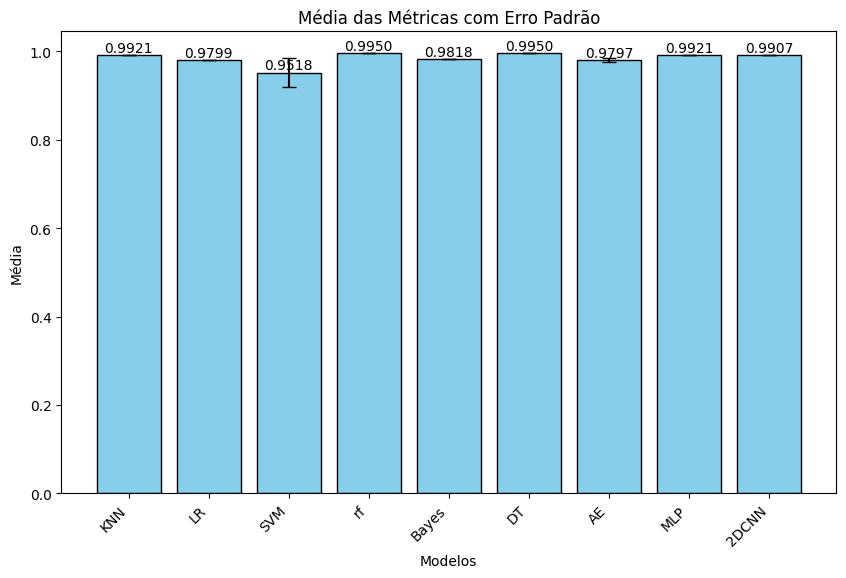

In [16]:
medias_accuracy = df_medias_unificadas['Accuracy'].to_numpy()
desvios_accuracy = df_desvios_unificados['Accuracy'].to_numpy()
modelos = df_medias_unificadas['Algorithm'].to_numpy()

plt.figure(figsize=(10,6))
bars = plt.bar(modelos, medias_accuracy, yerr=desvios_accuracy,  # Use as médias e desvios padrão
               capsize=5, color='skyblue', edgecolor='black')

plt.title("Média das Métricas com Erro Padrão")
plt.ylabel("Média")
plt.xlabel("Modelos")

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()  # Obtém a altura da barra (média)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.4f}", ha='center', va='bottom', fontsize=10)

plt.show()
